In [7]:

"""

%pip install openpyxl
%pip install xgboost
% pip install catboost

"""


'\n\n%pip install openpyxl\n%pip install xgboost\n% pip install catboost\n\n'

In [25]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
Nafdl = pd.read_excel("NAFLD.xlsx")
df = Nafdl.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 62 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    int64  
 1   Age                                                                                          605 non-null    int64  
 2   Gender (Female=1, Male=2)                                                                    605 non-null    int64  
 3   Height                                                                                       605 non-null    int64  
 4   Weight                                                                                       605 non-null    int64  
 5   Body Mass Index                     

In [11]:
df.describe()

,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,576.000000,598.000000,605.000000,605.000000,...,605.000000,605.000000,605.000000,605.00000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,303.000000,46.302479,1.530579,164.790083,86.403306,31.868711,109.440972,104.306020,127.276033,82.423140,...,2.884298,1.256198,5.082645,0.71405,0.676033,0.361983,0.178512,0.039669,1.112397,1.902479
std,174.792734,10.646148,0.499477,9.920240,14.379183,5.106853,10.588755,10.385775,15.314631,9.941857,...,1.042079,1.164663,1.597736,0.45224,0.468375,0.480972,0.383260,0.195343,0.316115,0.296911
min,1.000000,18.000000,1.000000,135.000000,48.000000,18.290000,63.000000,70.000000,90.000000,51.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,152.000000,38.000000,1.000000,157.000000,78.000000,28.610000,102.000000,98.000000,120.000000,80.000000,...,2.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,303.000000,47.000000,2.000000,165.000000,85.000000,31.210000,108.000000,104.000000,121.000000,80.000000,...,3.000000,1.000000,5.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,454.000000,54.000000,2.000000,172.000000,94.000000,34.520000,115.000000,110.000000,135.000000,90.000000,...,4.000000,2.000000,6.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,605.000000,71.000000,2.000000,193.000000,158.000000,56.000000,155.000000,147.000000,190.000000,120.000000,...,4.000000,4.000000,8.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [12]:
columns1 = df.columns
columns1

Index(['Patient No.', 'Age', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Waist Circumference', 'Hip Circumference',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)',
       'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Microalbumin Spot Urine', 'Microalbumin/Creatinine Ratio',
       'TSH', 'CK', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'PT', 'INR',
       'Vitamin D', 'Ferritin', 'Ceruloplasmin', 'C Peptide', 'Glucose',
       'Insulin', 'HOMA',
       'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
       'U

In [13]:
df.dtypes

Patient No.                                                                                    int64
Age                                                                                            int64
Gender (Female=1, Male=2)                                                                      int64
Height                                                                                         int64
Weight                                                                                         int64
                                                                                               ...  
Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)    int64
Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)       int64
Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)                                 int64
Diagnosis according to SAF (NASH=1, NAFL=2)                                                

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient No.,605.0,303.000000,174.792734,1.0,152.0,303.0,454.0,605.0
Age,605.0,46.302479,10.646148,18.0,38.0,47.0,54.0,71.0
"Gender (Female=1, Male=2)",605.0,1.530579,0.499477,1.0,1.0,2.0,2.0,2.0
Height,605.0,164.790083,9.920240,135.0,157.0,165.0,172.0,193.0
Weight,605.0,86.403306,14.379183,48.0,78.0,85.0,94.0,158.0
...,...,...,...,...,...,...,...,...
"Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)",605.0,0.361983,0.480972,0.0,0.0,0.0,1.0,1.0
"Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)",605.0,0.178512,0.383260,0.0,0.0,0.0,0.0,1.0
"Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)",605.0,0.039669,0.195343,0.0,0.0,0.0,0.0,1.0
"Diagnosis according to SAF (NASH=1, NAFL=2)",605.0,1.112397,0.316115,1.0,1.0,1.0,1.0,2.0


In [15]:
# tüm kolonlar nümerik değerlere sahip olduğu için encoding yapılmayacak

# sadece scaling/normalizing yapalım

from sklearn.preprocessing import MinMaxScaler

scaled_data = MinMaxScaler().fit_transform(df)

df1 = pd.DataFrame(data=scaled_data, columns=df.columns)

df1

,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
0,0.000000,0.792453,0.0,0.258621,0.290909,0.457969,0.608696,0.441558,0.45,0.376812,...,0.5,0.25,0.428571,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.001656,0.698113,0.0,0.327586,0.227273,0.331212,0.413043,0.363636,0.30,0.304348,...,0.5,0.00,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.003311,0.660377,1.0,0.603448,0.481818,0.441793,0.576087,0.545455,0.30,0.420290,...,0.5,0.75,0.428571,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.004967,0.283019,1.0,0.689655,0.427273,0.337576,0.554348,0.571429,0.34,0.463768,...,0.5,0.25,0.428571,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.006623,0.094340,1.0,0.465517,0.181818,0.202068,0.413043,0.350649,0.34,0.405797,...,0.5,0.00,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0.993377,0.754717,0.0,0.258621,0.336364,0.516839,0.510870,0.493506,0.50,0.710145,...,1.0,0.25,0.714286,0.0,1.0,0.0,0.0,0.0,0.0,1.0
601,0.995033,0.849057,1.0,0.879310,0.463636,0.273667,0.489130,0.610390,0.30,0.420290,...,1.0,0.25,0.714286,0.0,1.0,0.0,0.0,0.0,0.0,1.0
602,0.996689,0.490566,0.0,0.413793,0.490909,0.583665,0.695652,0.493506,0.60,0.420290,...,1.0,0.75,0.714286,0.0,1.0,1.0,1.0,0.0,0.0,1.0
603,0.998344,0.490566,0.0,0.413793,0.490909,0.584991,0.695652,0.493506,0.60,0.420290,...,1.0,0.75,0.714286,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 62 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    float64
 1   Age                                                                                          605 non-null    float64
 2   Gender (Female=1, Male=2)                                                                    605 non-null    float64
 3   Height                                                                                       605 non-null    float64
 4   Weight                                                                                       605 non-null    float64
 5   Body Mass Index                     

In [17]:
df2 = df1.dropna(thresh=0.4 * len(df1), axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 56 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    float64
 1   Age                                                                                          605 non-null    float64
 2   Gender (Female=1, Male=2)                                                                    605 non-null    float64
 3   Height                                                                                       605 non-null    float64
 4   Weight                                                                                       605 non-null    float64
 5   Body Mass Index                     

In [18]:

def fill_with_mean(df2):
    for col in df2.columns:
        missing_percentage = df2[col].isna().mean()
        if missing_percentage < 0.1:
            df2[col].fillna(df2[col].mean(), inplace=True)
    return df2

df2_1 = fill_with_mean(df2)

df2_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 56 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    float64
 1   Age                                                                                          605 non-null    float64
 2   Gender (Female=1, Male=2)                                                                    605 non-null    float64
 3   Height                                                                                       605 non-null    float64
 4   Weight                                                                                       605 non-null    float64
 5   Body Mass Index                     

/tmp/ipykernel_5834/721406372.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mean(), inplace=True)
/tmp/ipykernel_5834/721406372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].fillna(df2[col].mean(), inplace=True)


In [19]:
df2_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient No.,605.0,0.500000,0.289392,0.0,0.250000,0.500000,0.750000,1.0
Age,605.0,0.534009,0.200871,0.0,0.377358,0.547170,0.679245,1.0
"Gender (Female=1, Male=2)",605.0,0.530579,0.499477,0.0,0.000000,1.000000,1.000000,1.0
Height,605.0,0.513622,0.171039,0.0,0.379310,0.517241,0.637931,1.0
Weight,605.0,0.349121,0.130720,0.0,0.272727,0.336364,0.418182,1.0
Body Mass Index,605.0,0.360082,0.135424,0.0,0.273667,0.342615,0.430390,1.0
Waist Circumference,605.0,0.504793,0.112298,0.0,0.434783,0.500000,0.565217,1.0
Hip Circumference,605.0,0.445533,0.134096,0.0,0.363636,0.441558,0.519481,1.0
Systolic Blood Pressure,605.0,0.372760,0.153146,0.0,0.300000,0.310000,0.450000,1.0
Diastolic Blood Pressure,605.0,0.455408,0.144085,0.0,0.420290,0.420290,0.565217,1.0


# null değerleri RF modeli ile dolduracağız

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:



data=df2_1
# null değer bulunan kolon isimleri:
columns_with_nulls = data.columns[data.isnull().any()].tolist()


for column in columns_with_nulls:
    # null değer bulunan kolaonların null değer bulunmayan satırlarını almak(eğitim verisi)
    train_data = data[data[column].notnull()]
    # 
    X_train = train_data.drop(columns_with_nulls, axis=1)
    y_train = train_data[column]

    # tahmin yapılacak kolonun null değer içeren satırlarını almak
    test_data = data[data[column].isnull()]
    # tahmin yapılacak kolonun null değer içeren satırlarından  null değer içeren diğer kolonları sil
    X_test = test_data.drop(columns_with_nulls, axis=1)

    # rf ile missing value ları tahmin edip doldur
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)
    data.loc[data[column].isnull(), column] = rf_regressor.predict(X_test)
   

/tmp/ipykernel_5834/3085298109.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column].isnull(), column] = rf_regressor.predict(X_test)
/tmp/ipykernel_5834/3085298109.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column].isnull(), column] = rf_regressor.predict(X_test)
/tmp/ipykernel_5834/3085298109.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column].isnull(), column] = rf_

In [22]:
# verisetimizde hiç null değer kalmadı
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 56 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    float64
 1   Age                                                                                          605 non-null    float64
 2   Gender (Female=1, Male=2)                                                                    605 non-null    float64
 3   Height                                                                                       605 non-null    float64
 4   Weight                                                                                       605 non-null    float64
 5   Body Mass Index                     

In [23]:

X = data.drop(columns=['Diagnosis according to SAF (NASH=1, NAFL=2)', 'Patient No.']) 
y = data['Diagnosis according to SAF (NASH=1, NAFL=2)']



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    #"CatBoost": CatBoostClassifier(silent=True)
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = {}
results2 = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    accuracies = []
    f1_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')  

        accuracies.append(accuracy)
        f1_scores.append(f1)
    
    mean_accuracy = np.mean(accuracies)
    results[model_name] = mean_accuracy
    print(f"{model_name} Mean Accuracy: {mean_accuracy:}")

    mean_f1 = np.mean(f1_scores)
    results2[model_name] = mean_f1
    print(f"{model_name} Mean F1 Score: {mean_f1:}\n\n")



Evaluating model: KNN
KNN Mean Accuracy: 0.9669421487603305
KNN Mean F1 Score: 0.9639551609337037


Evaluating model: Naive Bayes
Naive Bayes Mean Accuracy: 0.9123966942148762
Naive Bayes Mean F1 Score: 0.9202386938031669


Evaluating model: Decision Tree
Decision Tree Mean Accuracy: 0.9867768595041323
Decision Tree Mean F1 Score: 0.9866521355420497


Evaluating model: SVM
SVM Mean Accuracy: 0.9851239669421487
SVM Mean F1 Score: 0.9844219522974405


Evaluating model: Random Forest
Random Forest Mean Accuracy: 0.9917355371900827
Random Forest Mean F1 Score: 0.991530180581508


Evaluating model: AdaBoost
AdaBoost Mean Accuracy: 0.9917355371900827
AdaBoost Mean F1 Score: 0.991530180581508


Evaluating model: Gradient Boosting
Gradient Boosting Mean Accuracy: 0.9884297520661157
Gradient Boosting Mean F1 Score: 0.9882757787610009


Evaluating model: XGBoost
XGBoost Mean Accuracy: 0.9917355371900827
XGBoost Mean F1 Score: 0.991530180581508




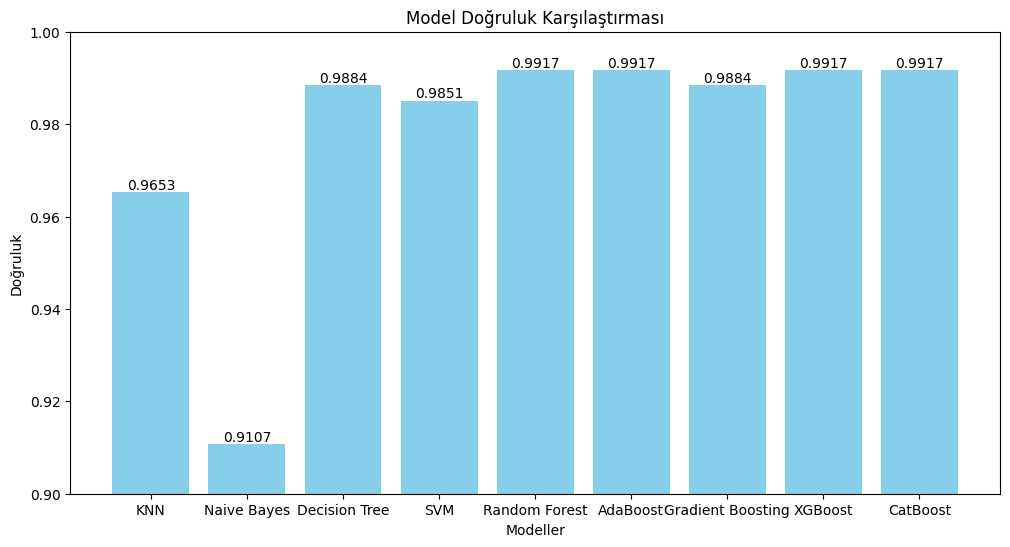

In [26]:

models = ["KNN", "Naive Bayes", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost", "CatBoost"]
accuracies = [0.9653, 0.9107, 0.9884, 0.9851, 0.9917, 0.9917, 0.9884, 0.9917, 0.9917]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')

plt.title('Model Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.ylim(0.9, 1)  

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f"{accuracy:.4f}", ha='center', va='bottom')

plt.show()


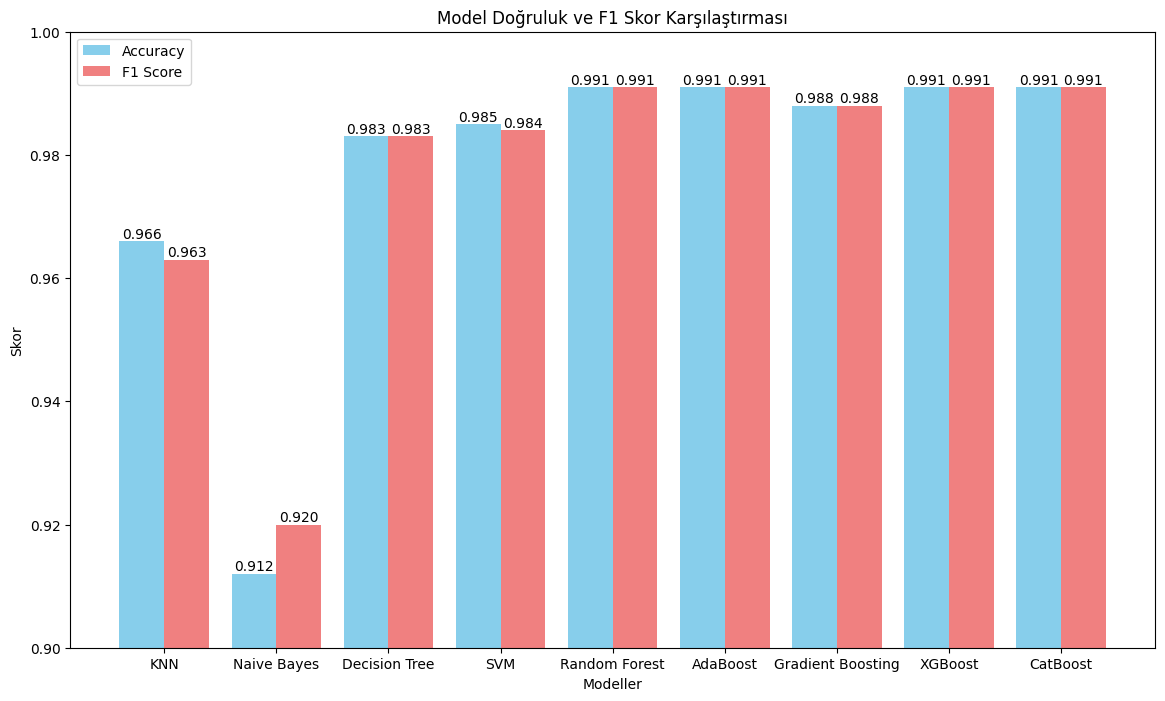

In [27]:


models = ["KNN", "Naive Bayes", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost", "CatBoost"]
accuracies = [0.966, 0.912, 0.983, 0.985, 0.991, 0.991, 0.988, 0.991, 0.991]
f1_scores = [0.963, 0.920, 0.983, 0.984, 0.991, 0.991, 0.988, 0.991, 0.991]

x = np.arange(len(models))
width = 0.40

plt.figure(figsize=(14, 8))
bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='lightcoral')

plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.title('Model Doğruluk ve F1 Skor Karşılaştırması')
plt.xticks(x, models)
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}', ha='center', va='bottom')

plt.ylim(0.9, 1)
plt.show()


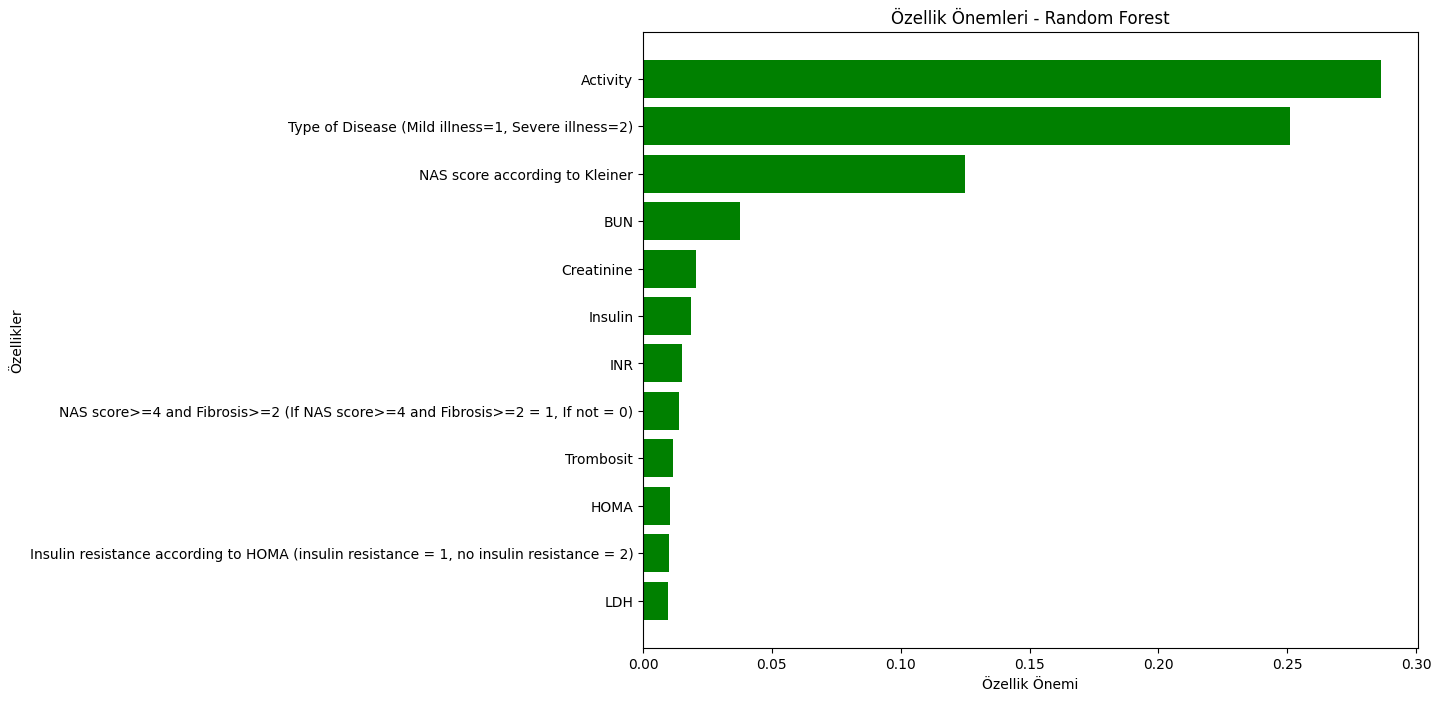

                                              Feature  Importance
45                                           Activity    0.286407
53  Type of Disease (Mild illness=1, Severe illnes...    0.251090
47                     NAS score according to Kleiner    0.124987
41                                                BUN    0.037806
42                                         Creatinine    0.020718
37                                            Insulin    0.018535
33                                                INR    0.015067
48  NAS score>=4 and Fibrosis>=2 (If NAS score>=4 ...    0.013930
30                                          Trombosit    0.011672
38                                               HOMA    0.010484
39  Insulin resistance according to HOMA (insulin ...    0.010090
18                                                LDH    0.009702


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


feature_importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).head(12)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellikler')
plt.title('Özellik Önemleri - Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(importance_df)


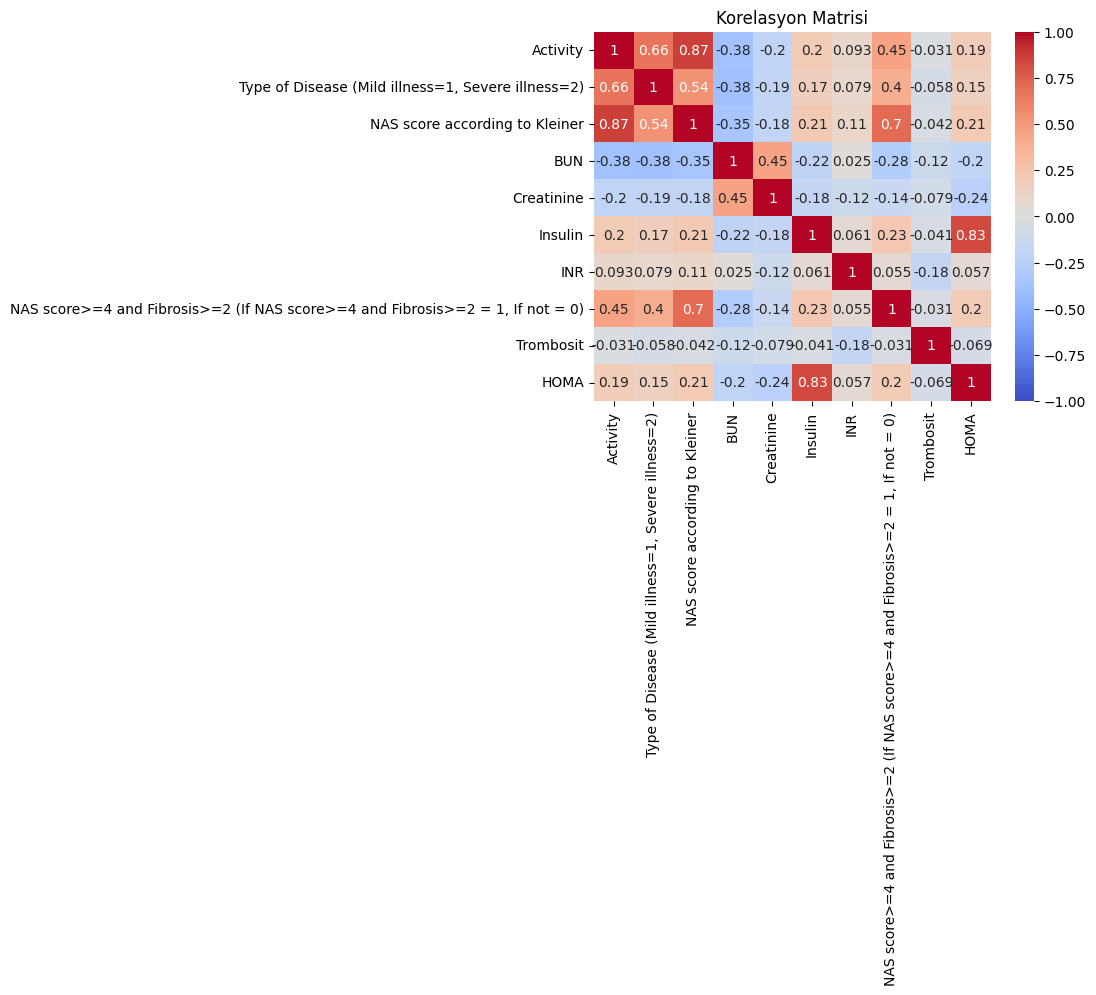

In [30]:
corr = data[importance_df["Feature"][:10]].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()


In [26]:
f1_score(y_val, y_pred)

0.9629629629629629

In [31]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       107
         1.0       1.00      0.93      0.96        14

    accuracy                           0.99       121
   macro avg       1.00      0.96      0.98       121
weighted avg       0.99      0.99      0.99       121



## 'Type of Disease (Mild illness=1, Severe illness=2)' hedef deişkeni al

In [32]:

X = data.drop(columns=['Type of Disease (Mild illness=1, Severe illness=2)', 'Patient No.']) 
y = data['Type of Disease (Mild illness=1, Severe illness=2)']



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    #"CatBoost": CatBoostClassifier(silent=True)
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    accuracies = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    results[model_name] = mean_accuracy
    print(f"{model_name} Mean Accuracy: {mean_accuracy:.4f}\n")

    

Evaluating model: KNN
KNN Mean Accuracy: 0.9769

Evaluating model: Naive Bayes
Naive Bayes Mean Accuracy: 0.9950

Evaluating model: Decision Tree
Decision Tree Mean Accuracy: 1.0000

Evaluating model: SVM
SVM Mean Accuracy: 0.9901

Evaluating model: Random Forest
Random Forest Mean Accuracy: 0.9934

Evaluating model: AdaBoost
AdaBoost Mean Accuracy: 1.0000

Evaluating model: Gradient Boosting
Gradient Boosting Mean Accuracy: 1.0000

Evaluating model: XGBoost
XGBoost Mean Accuracy: 0.9917



## 'Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)' hedef değişkeni için sonuçlar

In [59]:

X = data.drop(columns=['Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)', 'Patient No.']) 
y = data['Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)']



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    #"CatBoost": CatBoostClassifier(silent=True)
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    accuracies = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    results[model_name] = mean_accuracy
    print(f"{model_name} Mean Accuracy: {mean_accuracy:.4f}\n")




Evaluating model: KNN
KNN Mean Accuracy: 0.9603

Evaluating model: Naive Bayes
Naive Bayes Mean Accuracy: 1.0000

Evaluating model: Decision Tree
Decision Tree Mean Accuracy: 1.0000

Evaluating model: SVM
SVM Mean Accuracy: 0.9603

Evaluating model: Random Forest
Random Forest Mean Accuracy: 0.9967

Evaluating model: AdaBoost
AdaBoost Mean Accuracy: 1.0000

Evaluating model: Gradient Boosting
Gradient Boosting Mean Accuracy: 1.0000

Evaluating model: XGBoost
XGBoost Mean Accuracy: 1.0000

Evaluating model: CatBoost
CatBoost Mean Accuracy: 1.0000

